In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['species'] = iris.target

df_without_species = df.drop(columns=['species'])

print(df_without_species.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
df_without_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df_without_species.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print("Null values in each column:")
print(df_without_species.isnull().sum())

Null values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [8]:
df_without_species.duplicated().sum()


1

In [9]:
df_without_species.drop_duplicates(inplace=True)

In [10]:
# FEATURE SCALING

# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform standard scaling on the dataset (excluding the species column)
scaled_data = scaler.fit_transform(df_without_species)

# Create a new DataFrame for the scaled data
scaled_df = pd.DataFrame(data=scaled_data, columns=iris.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.898033          1.012401          -1.333255         -1.308624
1          -1.139562         -0.137353          -1.333255         -1.308624
2          -1.381091          0.322549          -1.390014         -1.308624
3          -1.501855          0.092598          -1.276496         -1.308624
4          -1.018798          1.242352          -1.333255         -1.308624


#### LOADED THE DATA AND DO NECCESSERY PREPROCESSING

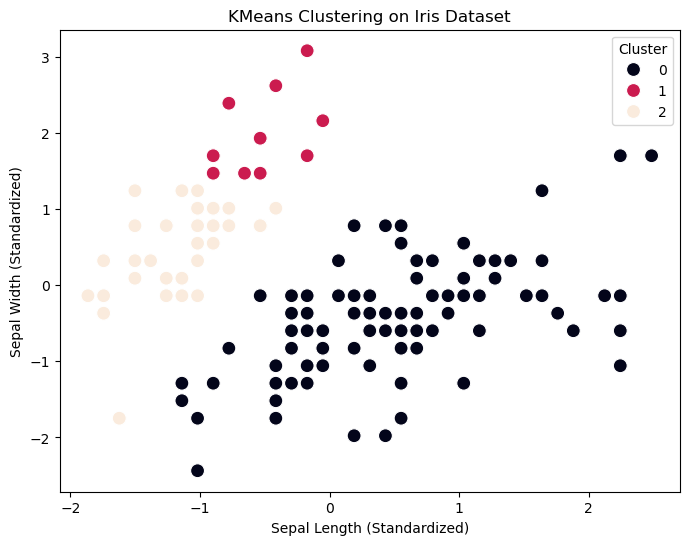

In [12]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize KMeans with 3 clusters (since the Iris dataset has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the scaled data
kmeans.fit(scaled_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame for visualization
scaled_df['cluster'] = cluster_labels

# Visualize the clusters using a scatter plot
# We'll use the first two features for simplicity
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_df.iloc[:, 0],  # sepal length
    y=scaled_df.iloc[:, 1],  # sepal width
    hue=scaled_df['cluster'],  # color by cluster
    palette='rocket',
    s=100
)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend(title='Cluster')
plt.show()

K-Means Clustering Algorithm

K-Means is a widely used clustering algorithm that partitions data into K distinct clusters. The algorithm consists of the following steps:

1. Initialize Centroids: Randomly select K initial cluster centroids.
2. Assign Points to Clusters: Assign each data point to the nearest centroid based on a distance metric (e.g., Euclidean distance).
3. Update Centroids: Recalculate the centroids as the mean of all points assigned to a cluster.
4. Iterate: Repeat steps 2 and 3 until the centroids converge or a maximum number of iterations is reached.

Suitability for the Iris Dataset

The Iris dataset is an ideal candidate for K-Means clustering due to its well-defined clusters corresponding to three species: Setosa, Versicolor, and Virginica. The algorithm excels in datasets with natural groupings, as it seeks to partition data points into compact, spherical clusters.

The Iris dataset's four numerical features (sepal length, sepal width, petal length, and petal width) provide a solid foundation for clustering. K-Means clustering can effectively identify patterns and relationships within the dataset, making it a suitable choice for this analysis.

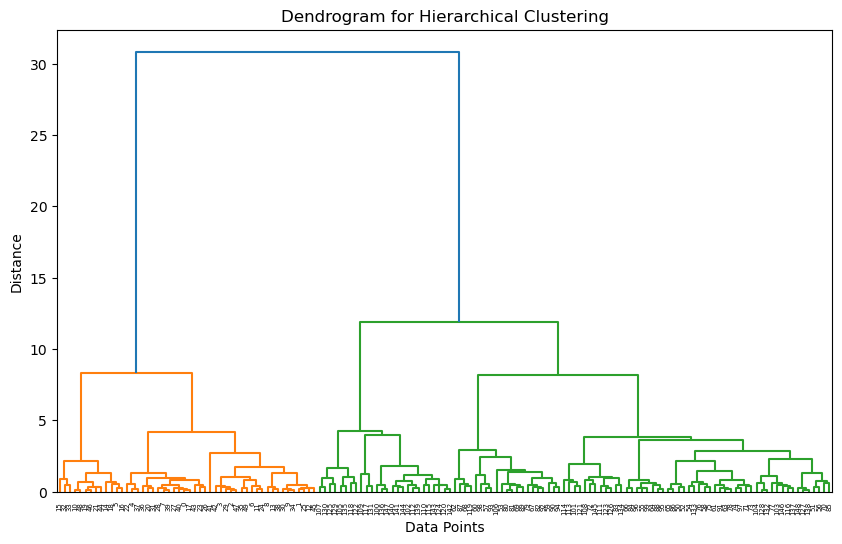

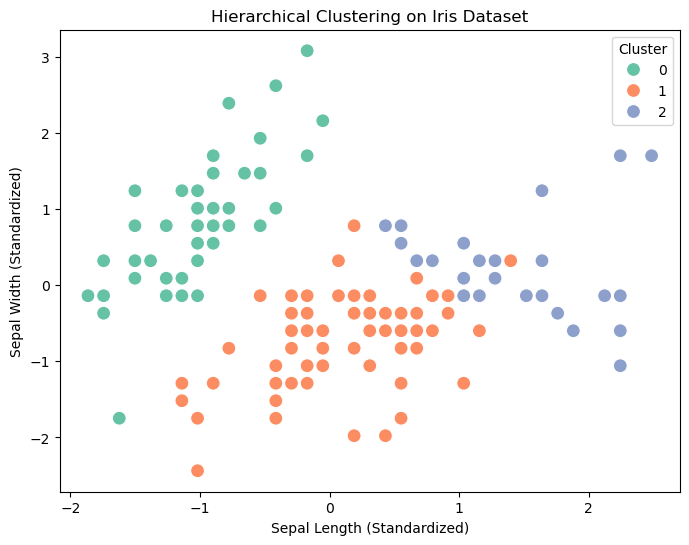

In [14]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Compute the linkage matrix
linkage_matrix = linkage(scaled_df.iloc[:, :-1], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Fit the model and predict cluster labels
hierarchical_labels = hierarchical.fit_predict(scaled_df.iloc[:, :-1])

# Add the cluster labels to the DataFrame
scaled_df['hierarchical_cluster'] = hierarchical_labels

# Visualize the clusters using a scatter plot (first two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_df.iloc[:, 0],  # sepal length
    y=scaled_df.iloc[:, 1],  # sepal width
    hue=scaled_df['hierarchical_cluster'],  # color by cluster
    palette='Set2',
    s=100
)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend(title='Cluster')
plt.show()

Hierarchical clustering is well-suited for the Iris dataset because:

It can reveal hierarchical relationships among clusters, which may exist naturally in the dataset.

It doesn’t require specifying the number of clusters upfront, unlike KMeans.

The dendrogram provides an insightful way to explore possible cluster structures and verify the suitability of the dataset for clustering.